In [2]:
import pandas as pd

data = pd.read_csv("preprocessed_apartment_rentals_one_hot_encoded_states.csv")
print(data["state"])
# alle Spalten droppen, die mit 'state_' anfangen
cols_to_drop = [col for col in data.columns if col.startswith("state_")]
data = data.drop(columns=cols_to_drop)
data.to_csv("preprocessed_apartment_rentals_no_state_dummies_nocluster.csv", index=False)



0        CA
1        VA
2        NC
3        CA
4        NM
         ..
98617    TX
98618    FL
98619    CA
98620    NC
98621    CA
Name: state, Length: 98622, dtype: object


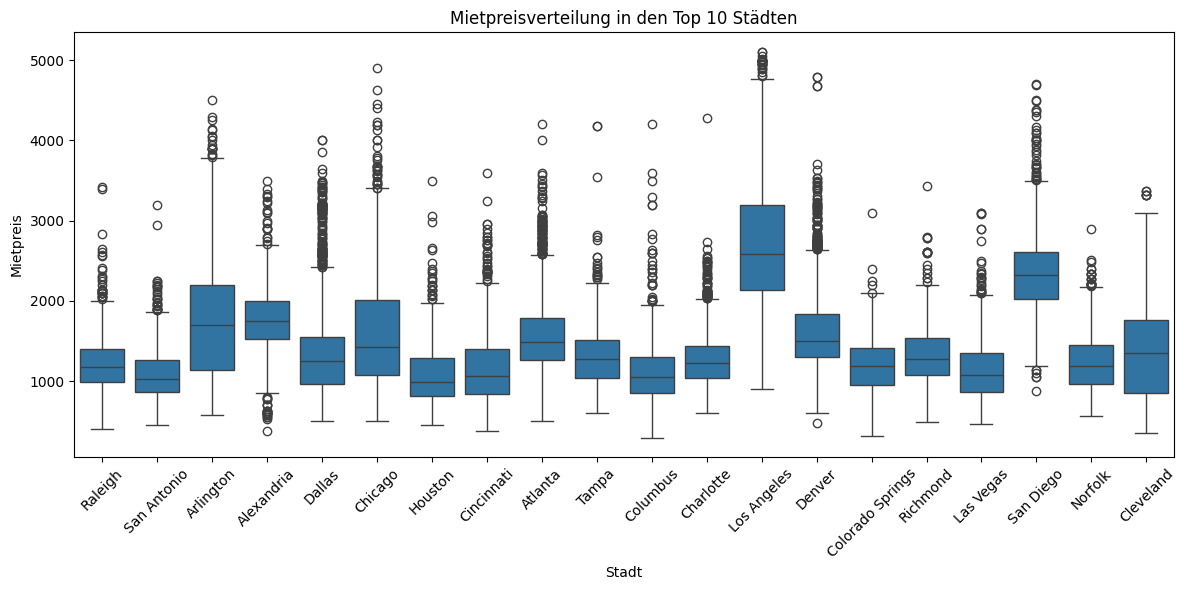

C:\Users\User\AppData\Local\Temp\ipykernel_1201144\1948297920.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cityname', y='price', data=data_top, inner='quartile', palette='pastel')


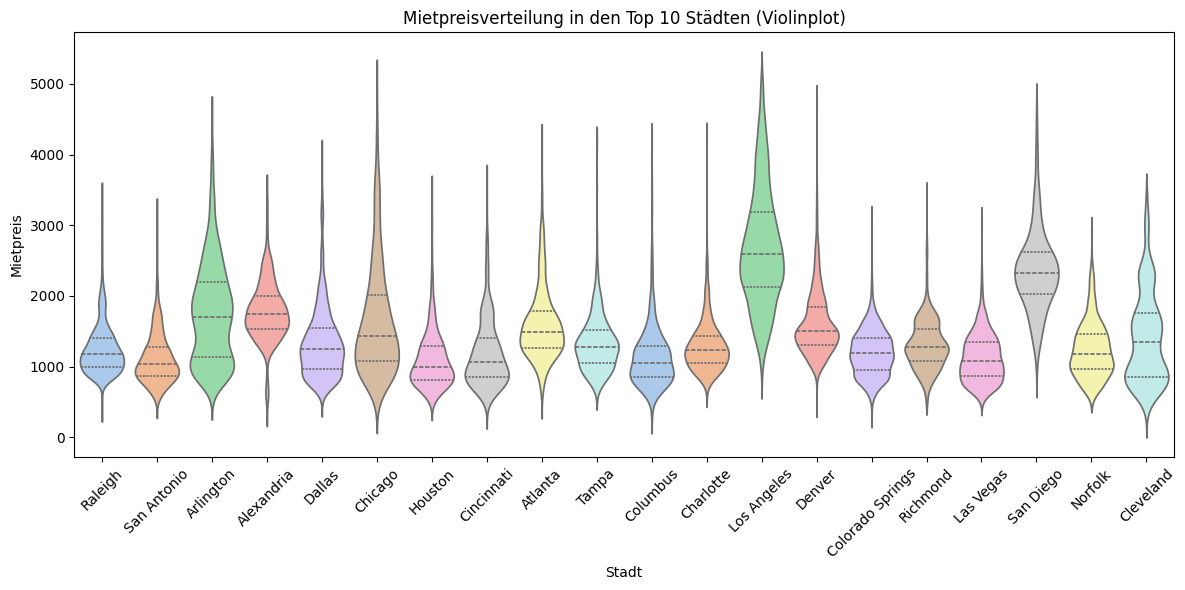

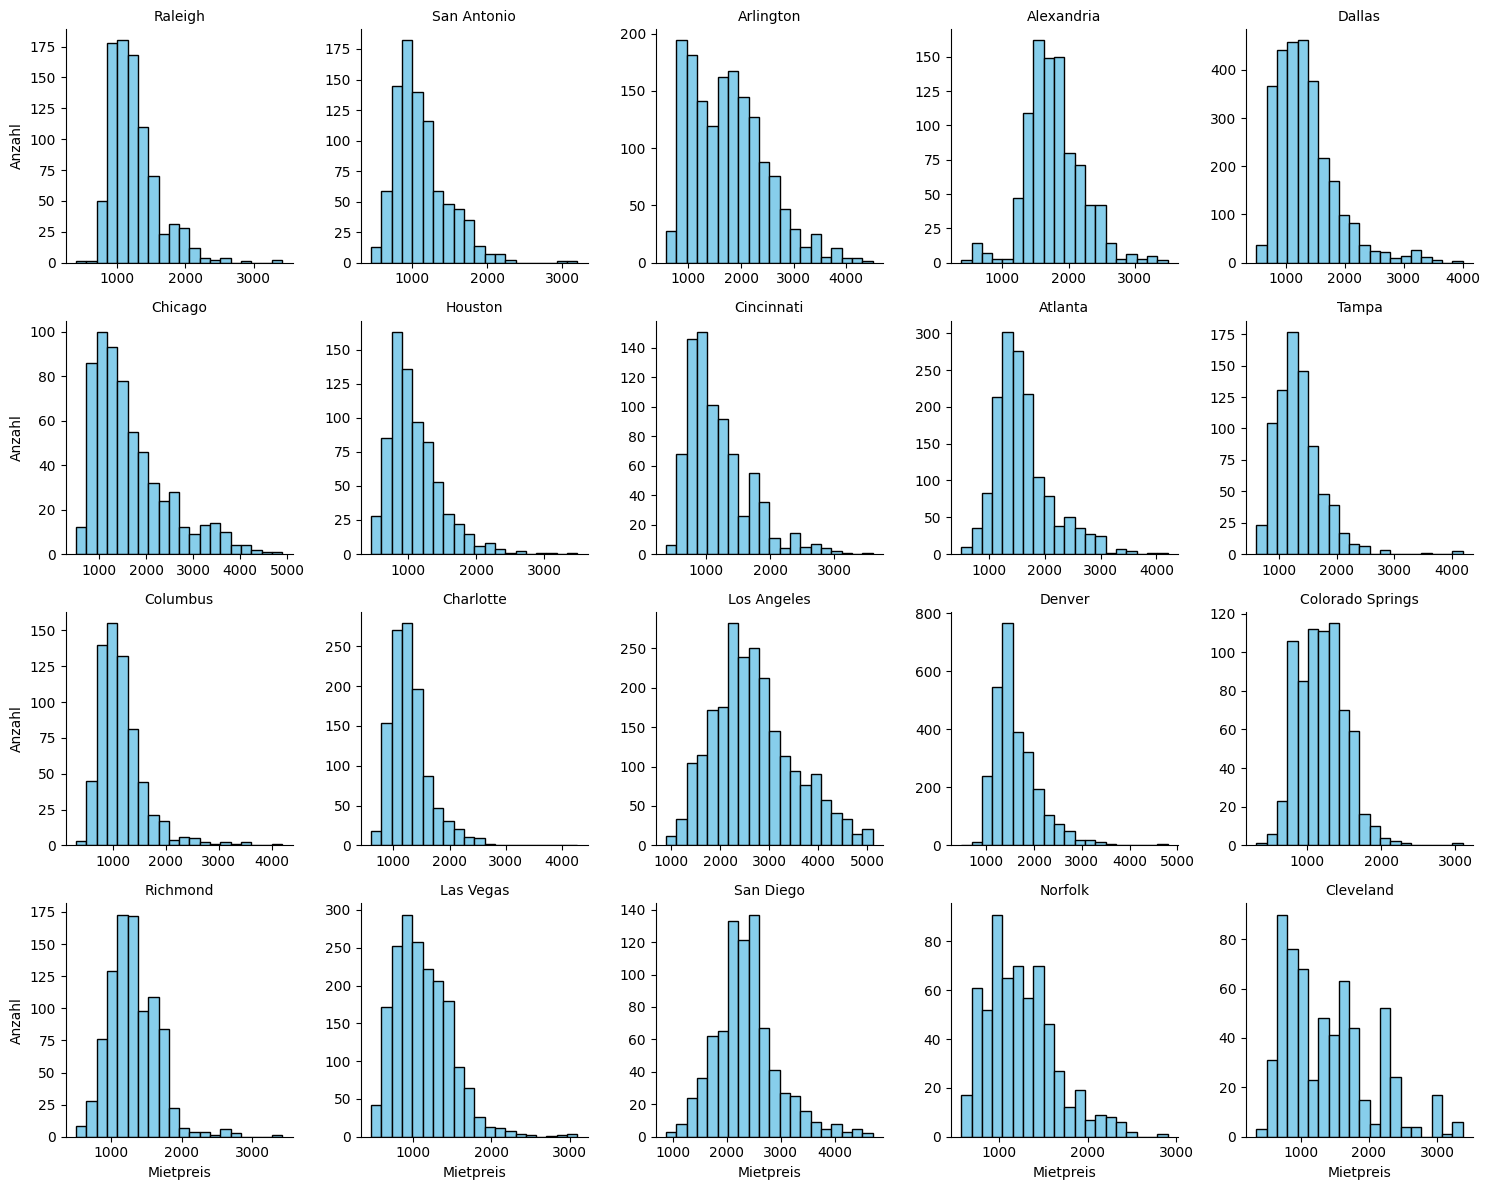

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
top_cities = data['cityname'].value_counts().nlargest(20).index
data_top = data[data['cityname'].isin(top_cities)]

# Plot 1: Boxplot der Preisverteilung pro Stadt
plt.figure(figsize=(12,6))
sns.boxplot(x='cityname', y='price', data=data_top)
plt.xticks(rotation=45)
plt.title('Mietpreisverteilung in den Top 10 Städten')
plt.ylabel('Mietpreis')
plt.xlabel('Stadt')
plt.tight_layout()
plt.show()

# Plot 2: Violinplot (zeigt Dichte besser)
plt.figure(figsize=(12,6))
sns.violinplot(x='cityname', y='price', data=data_top, inner='quartile', palette='pastel')
plt.xticks(rotation=45)
plt.title('Mietpreisverteilung in den Top 10 Städten (Violinplot)')
plt.ylabel('Mietpreis')
plt.xlabel('Stadt')
plt.tight_layout()
plt.show()

# Plot 3: Histogramme pro Stadt (Faceted)
g = sns.FacetGrid(data_top, col="cityname", col_wrap=5, height=3, sharex=False, sharey=False)
g.map(plt.hist, "price", bins=20, color='skyblue', edgecolor='black')
g.set_titles("{col_name}")
g.set_axis_labels("Mietpreis", "Anzahl")
plt.tight_layout()
plt.show()


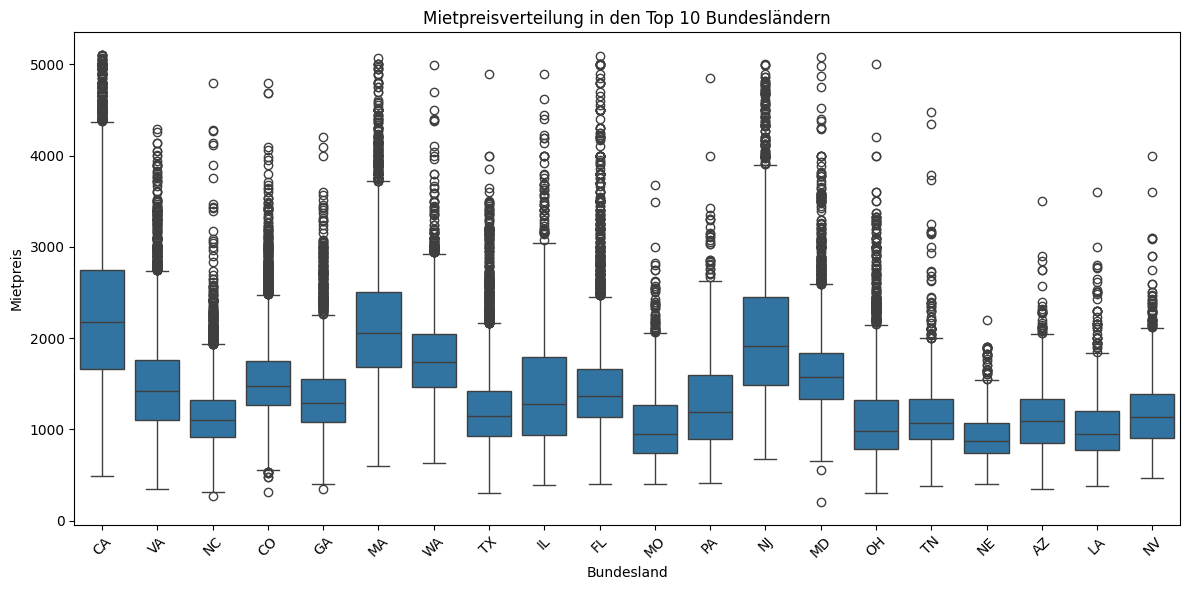

C:\Users\User\AppData\Local\Temp\ipykernel_1201144\3304174219.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='state', y='price', data=data_top_states, inner='quartile', palette='pastel')


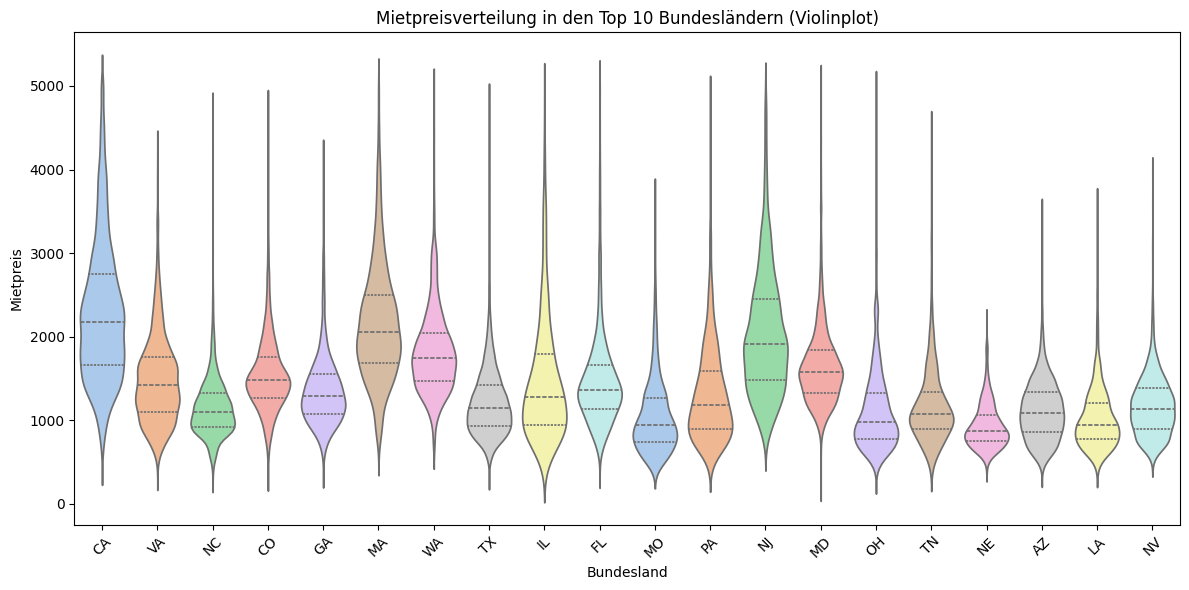

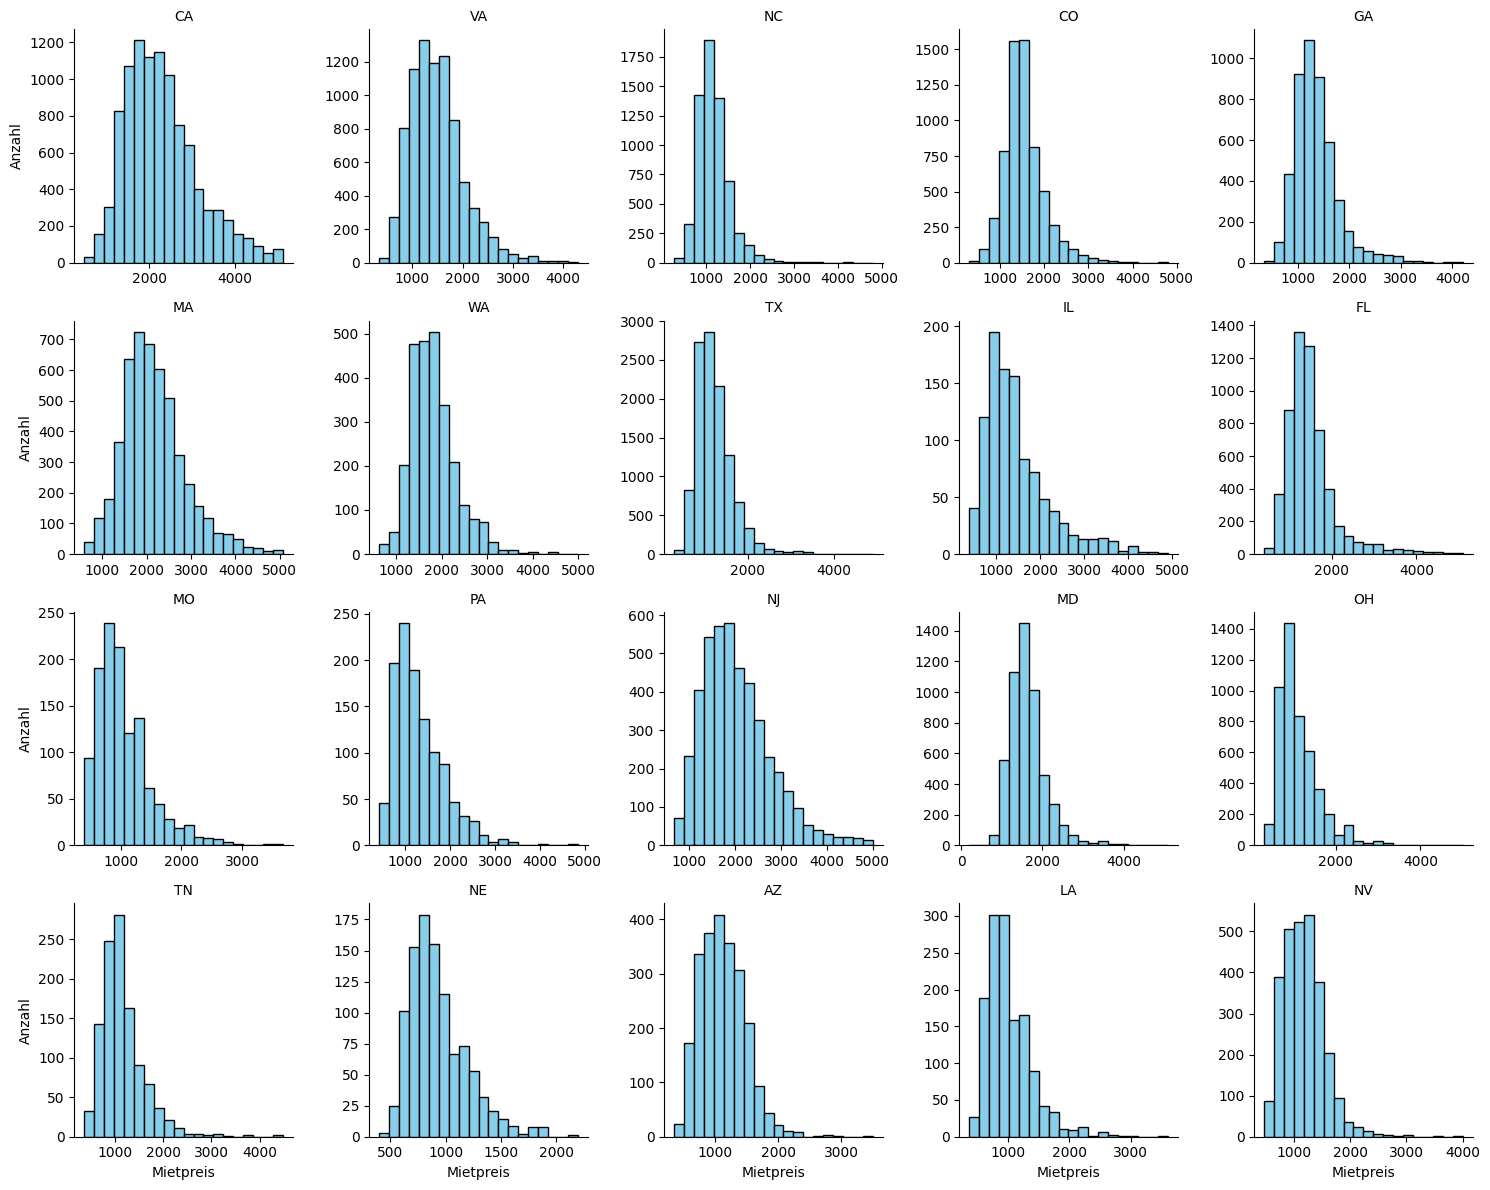

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nur Top 10 States nach Anzahl der Einträge
top_states = data['state'].value_counts().nlargest(20).index
data_top_states = data[data['state'].isin(top_states)]

# Plot 1: Boxplot der Preisverteilung pro Bundesland
plt.figure(figsize=(12,6))
sns.boxplot(x='state', y='price', data=data_top_states)
plt.xticks(rotation=45)
plt.title('Mietpreisverteilung in den Top 10 Bundesländern')
plt.ylabel('Mietpreis')
plt.xlabel('Bundesland')
plt.tight_layout()
plt.show()

# Plot 2: Violinplot (zeigt Dichte besser)
plt.figure(figsize=(12,6))
sns.violinplot(x='state', y='price', data=data_top_states, inner='quartile', palette='pastel')
plt.xticks(rotation=45)
plt.title('Mietpreisverteilung in den Top 10 Bundesländern (Violinplot)')
plt.ylabel('Mietpreis')
plt.xlabel('Bundesland')
plt.tight_layout()
plt.show()

# Plot 3: Histogramme pro Bundesland (Faceted)
g = sns.FacetGrid(data_top_states, col="state", col_wrap=5, height=3, sharex=False, sharey=False)
g.map(plt.hist, "price", bins=20, color='skyblue', edgecolor='black')
g.set_titles("{col_name}")
g.set_axis_labels("Mietpreis", "Anzahl")
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import numpy as np

city_features = data.groupby('cityname')['price'].agg([
    np.median, np.mean, lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)
]).rename(columns={'<lambda_0>': '25th_percentile', '<lambda_1>': '75th_percentile'})
print(city_features)

C:\Users\User\AppData\Local\Temp\ipykernel_1201144\1561339941.py:4: FutureWarning: The provided callable <function median at 0x000001E7F599D9E0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  city_features = data.groupby('cityname')['price'].agg([
C:\Users\User\AppData\Local\Temp\ipykernel_1201144\1561339941.py:4: FutureWarning: The provided callable <function mean at 0x000001E7F58671A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  city_features = data.groupby('cityname')['price'].agg([


             median         mean  25th_percentile  75th_percentile
cityname                                                          
Abbeville     711.0   722.111111           711.00           829.00
Aberdeen     1525.5  1517.409091          1383.75          1722.00
Abilene       697.5   747.000000           631.25           893.75
Abingdon     1374.5  1249.416667          1120.00          1465.00
Abington     1979.0  1920.275000          1758.50          2130.50
...             ...          ...              ...              ...
Zachary      1564.5  1464.000000          1233.00          1681.00
Zanesville    625.0   625.000000           625.00           625.00
Zebulon      1517.0  1671.235294          1399.00          2030.00
Zephyrhills  1515.0  1469.647059          1375.00          1575.00
Zion          819.0   838.666667           734.50           933.00

[2960 rows x 4 columns]


In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
city_features['cluster'] = kmeans.fit_predict(city_features)
cluster_cities = {i: city_features[city_features['cluster'] == i].index.tolist() for i in range(3)}
print(cluster_cities)
print(city_features)
# city_features hat schon die Cluster-Zuordnung
# city_features.index enthält die Stadtnamen
# city_features['cluster'] enthält die Cluster-Nummer
X = data.copy()
for col in ["cityname", "state"]:
    X[col] = X[col].astype("category")
y= data["price"]
# Neue Spalte in X hinzufügen, basierend auf 'cityname'
X['city_cluster'] = X['cityname'].map(city_features['cluster'])

X_cluster_0 = X[X["city_cluster"]==0]
X_cluster_1 = X[X["city_cluster"]==1]
X_cluster_2 = X[X["city_cluster"]==2]
y_cluster_0 = X_cluster_0["price"]
y_cluster_1 = X_cluster_1["price"]
y_cluster_2 = X_cluster_2["price"]


print(X_cluster_2["price"].mean())
X_cluster_0 = X_cluster_0.drop(columns = ["price"])
X_cluster_1 = X_cluster_1.drop(columns = ["price"])
X_cluster_2 = X_cluster_2.drop(columns = ["price"])
print(X_cluster_1.columns)

{0: ['Abbeville', 'Abilene', 'Absecon', 'Adelanto', 'Adelphi', 'Agawam', 'Aiken', 'Akron', 'Alanson', 'Albany', 'Albemarle', 'Albertville', 'Albuquerque', 'Allendale', 'Allentown', 'Alliance', 'Allison Park', 'Aloha', 'Altamonte Springs', 'Altavista', 'Altoona', 'Alvin', 'Amarillo', 'Ambridge', 'Amelia', 'Ames', 'Amsterdam', 'Anchorage', 'Anderson', 'Angleton', 'Anniston', 'Anoka', 'Ansonia', 'Anthem', 'Antioch', 'Apache Junction', 'Apex', 'Apple Valley', 'Appleton', 'Arcata', 'Archbald', 'Arden', 'Arkadelphia', 'Arvilla', 'Asheboro', 'Asheville', 'Ashford', 'Ashtabula', 'Athens', 'Athol', 'Atkins', 'Atlantic City', 'Augusta', 'Austell', 'Austin', 'Avon Lake', 'Avondale', 'Avondale Estates', 'Azle', 'Bacliff', 'Bahama', 'Bakersfield', 'Balch Springs', 'Ballwin', 'Bangor', 'Barberton', 'Bardstown', 'Barrington', 'Barstow', 'Baskerville', 'Batavia', 'Bath', 'Baton Rouge', 'Battle Creek', 'Battle Mountain', 'Bay City', 'Bay Minette', 'Bay Saint Louis', 'Baytown', 'Bealeton', 'Bear', 'Beau

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [7]:
X = X.drop(columns = ["price"])

In [181]:
from Nested_CV_targetEncoding import NestedCVRegressorWithTargetEncoding
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    random_state=42,
    n_jobs=-1,
    enable_categorical=True
    # alle CPU-Kerne nutzen
)

# Hyperparameter-Grid
xgb_params = {
    "n_estimators": [300],
    "max_depth": [2,5,7],
    "learning_rate": [0.2],
    #"subsample": [0.8, 1.0],
    #"colsample_bytree": [0.8, 1.0],
    #"gamma": [0, 1],  # Minimum Loss Reduction
    #"reg_alpha": [0, 0.1],  # L1 Regularisierung
    #"reg_lambda": [1, 5]    # L2 Regularisierung
}

xgb_cv = NestedCVRegressorWithTargetEncoding(xgb_model, xgb_params, encode_cols=[], scaler=None)

print("Starte XGBoost Nested CV...")
xgb_cv.run(X_cluster_2, y_cluster_2, output=True)

print("\n--- XGBoost Ergebnisse ---")
print("Mean R²:", xgb_cv.get_mean_r2())
print("Best params:", xgb_cv.get_best_params())


Starte XGBoost Nested CV...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Outer Fold 1/5 | Best Params: {'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 300} | Fit Time: 5.613s | Outer R²: 0.702 | MSE: 71864.360
Fitting 5 folds for each of 3 candidates, totalling 15 fits


KeyboardInterrupt: 

In [151]:
from sklearn.base import BaseEstimator, RegressorMixin, clone
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin


class ClusterRegressor(BaseEstimator, RegressorMixin): #braucht man für clone()
    def __init__(self, base_model, n_clusters=3, random_state=42):
        """
        base_model: sklearn-/xgboost-ähnliches Regressionsmodell
        n_clusters: Anzahl der Cluster
        random_state: Reproduzierbarkeit
        """
        self.base_model = base_model
        self.n_clusters = n_clusters
        self.random_state = random_state

        self.global_model_ = None
        self.city_to_cluster_ = {}
        self.cluster_cities = {}
        self.model_0 = None
        self.model_1 = None 
        self.model_2 = None

    def fit(self, X, y):
        X = pd.DataFrame(X).copy()
        y = pd.Series(y, index=X.index).copy()
        data = pd.concat([X, y.rename('price')], axis=1)
        
        city_features = data.groupby('cityname')['price'].agg([
          np.mean , lambda x: np.percentile(x, 10)#, lambda x: np.percentile(x, 90)
        ]).rename(columns={'<lambda_0>': '25th_percentile', '<lambda_1>': '75th_percentile'})
        #print(city_features)
        
        #KMeans für Städte
        kmeans = KMeans(n_clusters=3, random_state=1)
        city_features['cluster'] = kmeans.fit_predict(city_features)
        self.cluster_cities = {i: city_features[city_features['cluster'] == i].index.tolist() for i in range(3)}
        self.city_to_cluster_ = city_features['cluster'].to_dict()

        clusters = X["cityname"].map(self.city_to_cluster_)

        #print(self.cluster_cities)
        #print(city_features)
        X_enc = X  # Pipeline übernimmt Encoder + Scaler

        # 3️⃣ Modelle trainieren
        self.model_0 = clone(self.base_model).fit(X_enc[clusters == 0], y[clusters == 0])
        self.model_1 = clone(self.base_model).fit(X_enc[clusters == 1], y[clusters == 1])
        self.model_2 = clone(self.base_model).fit(X_enc[clusters == 2], y[clusters == 2])

        self.global_model_ = clone(self.base_model).fit(X_enc, y)

        print("Fitting abgeschlossen.")
        return self
    def predict(self, X):
        X = pd.DataFrame(X).copy()

        # Stadt → Cluster (NaN für unbekannte Städte)
        clusters = X["cityname"].map(self.city_to_cluster_)

        preds = np.empty(len(X))

        # Cluster 0
        mask = clusters == 0
        if mask.any():
            preds[mask] = self.model_0.predict(X[mask])

        # Cluster 1
        mask = clusters == 1
        if mask.any():
            preds[mask] = self.model_1.predict(X[mask])

        # Cluster 2
        mask = clusters == 2
        if mask.any():
            preds[mask] = self.model_2.predict(X[mask])

        # Fallback: unbekannte Städte
        fallback = clusters.isna()
        if fallback.any():
            preds[fallback] = self.global_model_.predict(X[fallback])

        return preds



In [131]:

from sklearn.linear_model import Ridge
from Nested_CV_targetEncoding import NestedCVRegressorWithTargetEncoding

Ridge_clustermodel_cv = NestedCVRegressorWithTargetEncoding(ClusterRegressor(Ridge()), {}, encode_cols=["cityname", "state"], scaler=None)

Ridge_clustermodel_cv.run(X, y, output=True)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: 

## Evaluate model by fitting once in outer loop

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=["price"]),
    data["price"],
    test_size=0.2,
    random_state=42
)

In [153]:
from category_encoders import TargetEncoder

te = TargetEncoder(cols=["cityname", "state"])

X_train_enc = te.fit_transform(X_train, y_train)
X_test_enc = te.transform(X_test)


model = ClusterRegressor(Ridge())
model.fit(X_train_enc, y_train)
preds = model.predict(X_test_enc)
from sklearn.metrics import r2_score
print("R² auf Testdaten:", r2_score(y_test, preds))

C:\Users\User\AppData\Local\Temp\ipykernel_1201144\3981570440.py:32: FutureWarning: The provided callable <function mean at 0x000001E7F58671A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  city_features = data.groupby('cityname')['price'].agg([


Fitting abgeschlossen.
R² auf Testdaten: 0.7007349732443342


In [154]:
city_mapping = dict(zip(X_train['cityname'], X_train_enc['cityname']))
for key, value in city_mapping.items():
    city_mapping[key] = model.city_to_cluster_[value]

C:\Users\User\AppData\Local\Temp\ipykernel_1201144\3914576017.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="cluster", y="price", data=df_plot, palette="Set2")


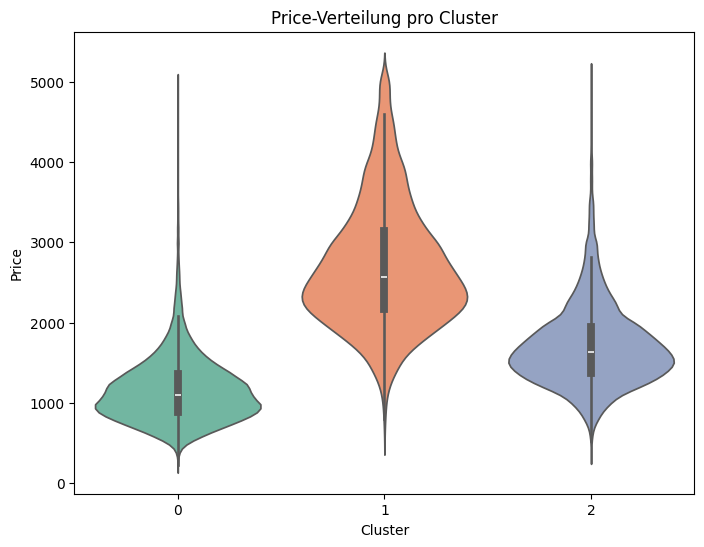

In [155]:
import pandas as pd

# city_mapping: cityname → cluster
# X_train: enthält cityname
# y_train: Preise

df_plot = pd.DataFrame({
    "cityname": X_train['cityname'],
    "cluster": X_train['cityname'].map(city_mapping),
    "price": y_train.values
})

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.violinplot(x="cluster", y="price", data=df_plot, palette="Set2")
plt.title("Price-Verteilung pro Cluster")
plt.xlabel("Cluster")
plt.ylabel("Price")
plt.show()


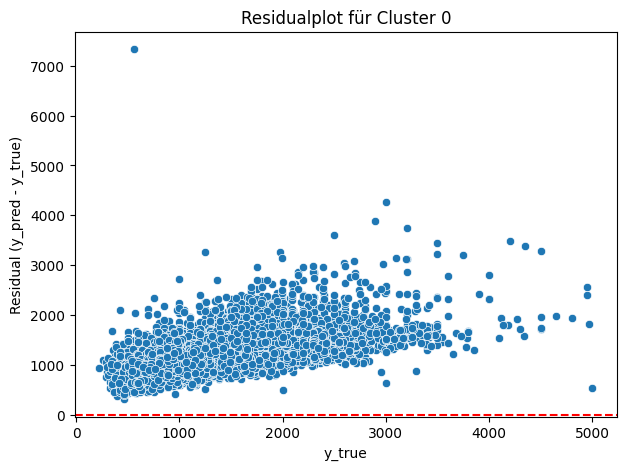

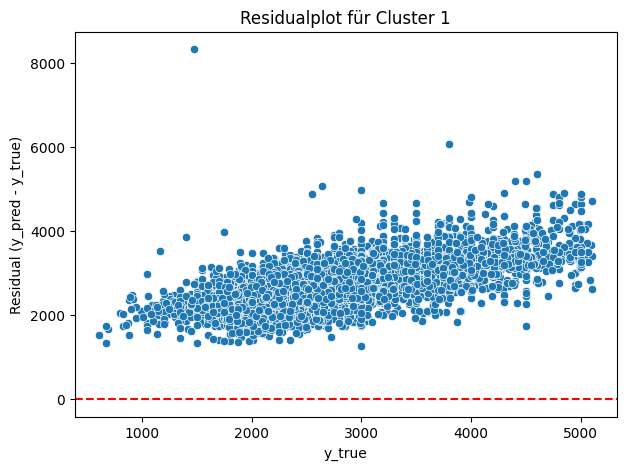

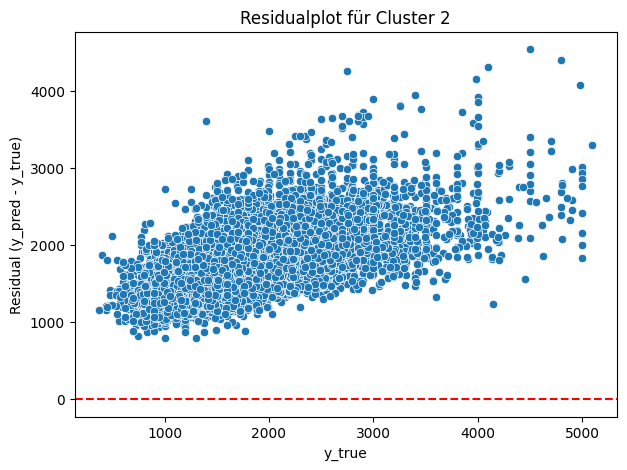

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# city_mapping: cityname -> cluster
# X_train_enc: Features für Prediction (encoded, falls nötig)
# model: dein ClusterRegressor
# y_train: wahre Preise

# Cluster pro Zeile
clusters_series = X_train['cityname'].map(city_mapping)

# Vorhersagen auf Trainingsdaten
y_pred = model.predict(X_train_enc)

# Residuals
residuals = y_pred

# DataFrame für Plot
df_resid = pd.DataFrame({
    "y_true": y_train.values,
    "residual": residuals,
    "cluster": clusters_series
})

import seaborn as sns

# Alle 3 Cluster getrennt plotten
for cluster_id in sorted(df_resid['cluster'].unique()):
    plt.figure(figsize=(7,5))
    subset = df_resid[df_resid['cluster'] == cluster_id]
    sns.scatterplot(x='y_true', y='residual', data=subset)
    plt.axhline(0, color='red', linestyle='--')  # Referenzlinie bei 0
    plt.title(f"Residualplot für Cluster {cluster_id}")
    plt.xlabel("y_true")
    plt.ylabel("Residual (y_pred - y_true)")
    plt.show()


In [157]:
model.model_0.coef_

array([ 154.29902876,  -67.94093278,   -6.188481  ,    0.56767868,
          0.56634602,    0.28910799,    0.22046067,   40.24617386,
         58.79472719,    0.        ,  150.94452044,  -41.20431234,
        -15.04671739, -127.26155134, -165.44285268,  139.68605371,
         58.12875754,  109.93631015])